In [1]:
from sklearn.model_selection import train_test_split
from IPython.display import display
import numpy as np
import pandas as pd
import mglearn as mg
import matplotlib.pyplot as plt

0.88


In [2]:
from sklearn.svm import SVC

In [4]:
from sklearn.datasets import load_iris

iris = load_iris()

In [5]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)
print(X_train.shape)
print(X_test.shape)

(112, 4)
(38, 4)


In [6]:
best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        score = svm.score(X_test, y_test)
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
            
print(best_score)
print(best_parameters)

0.9736842105263158
{'C': 100, 'gamma': 0.001}


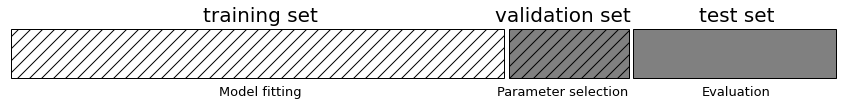

In [7]:
mg.plots.plot_threefold_split()

In [12]:
X_trainval, X_test, y_trainval, y_test = train_test_split(
    iris.data, iris.target, random_state=0)

X_train, X_valid, y_train, y_valid = train_test_split(
    X_trainval, y_trainval, random_state=1)

best_score = 0


In [13]:

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        score = svm.score(X_valid, y_valid)
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)

print(best_score)
print(best_parameters)
print(test_score)

0.9642857142857143
{'C': 10, 'gamma': 0.001}
0.9210526315789473


In [14]:
from sklearn.model_selection import cross_val_score

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma=gamma, C=C)
        scores = cross_val_score(svm, X_trainval, y_trainval, cv=5)
        score = np.mean(scores)
        
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)

In [15]:
print(test_score)

0.9736842105263158


ValueError: The number of FixedLocator locations (21), usually from a call to set_ticks, does not match the number of ticklabels (36).

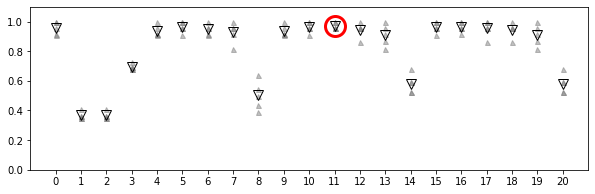

In [16]:
mg.plots.plot_cross_val_selection()

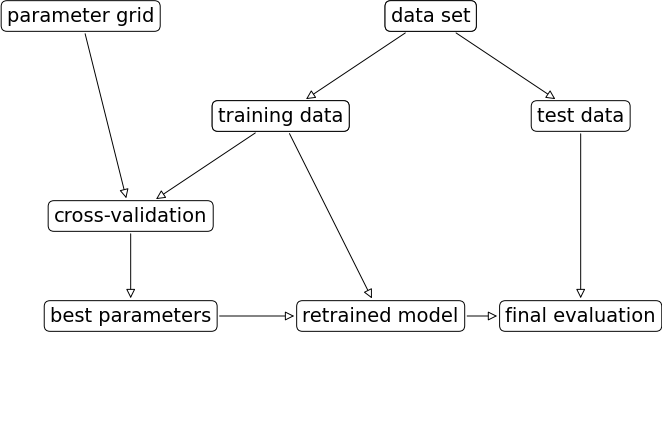

In [17]:
mg.plots.plot_grid_search_overview()

In [18]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
             'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
print(param_grid)

{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


In [19]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(SVC(), param_grid, cv=5, return_train_score=True)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)

In [21]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             return_train_score=True)

In [22]:
print(grid_search.score(X_test, y_test))

0.9736842105263158


In [23]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'C': 10, 'gamma': 0.1}
0.9731225296442687


In [24]:
print(grid_search.best_estimator_)

SVC(C=10, gamma=0.1)


In [25]:
pd.set_option('display.max_columns', None)

In [27]:
results = pd.DataFrame(grid_search.cv_results_)
display(np.transpose(results.head()))

,0,1,2,3,4
mean_fit_time,0.001261,0.000947,0.001002,0.000996,0.001119
std_fit_time,0.000313,0.000029,0.000185,0.000128,0.000116
mean_score_time,0.000524,0.000426,0.000372,0.000473,0.000492
std_score_time,0.000092,0.000054,0.000013,0.000147,0.000116
param_C,0.001,0.001,0.001,0.001,0.001
param_gamma,0.001,0.01,0.1,1,10
params,"{'C': 0.001, 'gamma': 0.001}","{'C': 0.001, 'gamma': 0.01}","{'C': 0.001, 'gamma': 0.1}","{'C': 0.001, 'gamma': 1}","{'C': 0.001, 'gamma': 10}"
split0_test_score,0.347826,0.347826,0.347826,0.347826,0.347826
split1_test_score,0.347826,0.347826,0.347826,0.347826,0.347826
split2_test_score,0.363636,0.363636,0.363636,0.363636,0.363636


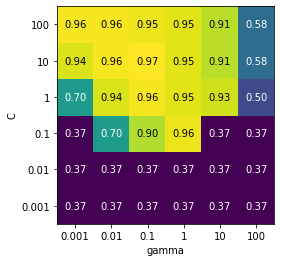

In [28]:
scores = np.array(results.mean_test_score).reshape(6, 6)

mg.tools.heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'],
                ylabel='C', yticklabels=param_grid['C'], cmap='viridis')

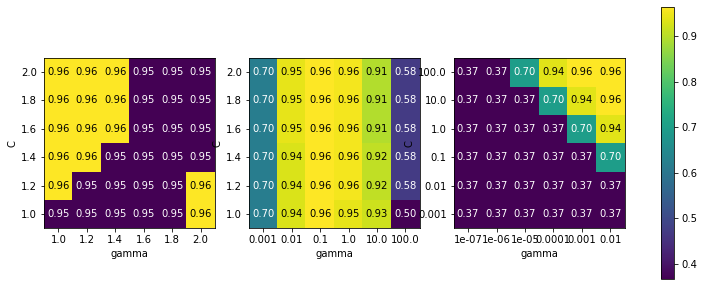

In [31]:
fig, axes = plt.subplots(1, 3, figsize=(13, 5))
param_grid_linear = {'C': np.linspace(1, 2, 6),
                    'gamma': np.linspace(1, 2, 6)}

param_grid_one_log = {'C': np.linspace(1, 2, 6),
                    'gamma': np.logspace(-3, 2, 6)}

param_grid_range = {'C': np.logspace(-3, 2, 6),
                    'gamma': np.logspace(-7, -2, 6)}

for param_grid, ax in zip([param_grid_linear, param_grid_one_log, param_grid_range], axes):
    grid_search = GridSearchCV(SVC(), param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    scores = grid_search.cv_results_['mean_test_score'].reshape(6, 6)
    scores_image = mg.tools.heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'],
                ylabel='C', yticklabels=param_grid['C'], cmap='viridis', ax=ax)
    
plt.colorbar(scores_image, ax=axes.tolist())

In [32]:
param_grid = [{'kernel': ['rbf'],
              'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             {'kernel': ['linear'],
             'C': [0.001, 0.01, 0.1, 1, 10, 100]}]
print(param_grid)

[{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}, {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}]


In [33]:
grid_search = GridSearchCV(SVC(), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
0.9731225296442687


In [34]:
results = pd.DataFrame(grid_search.cv_results_)
display(results.T)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41
mean_fit_time,0.00186,0.000943,0.000985,0.000994,0.001197,0.001067,0.000842,0.000907,0.000843,0.000791,0.000746,0.000813,0.000664,0.000649,0.000581,0.0006,0.000661,0.000753,0.000683,0.000527,0.000458,0.000514,0.000755,0.000821,0.000511,0.000431,0.000425,0.000524,0.000771,0.000822,0.000421,0.000409,0.000413,0.000523,0.000759,0.000814,0.000589,0.00053,0.000447,0.000471,0.000434,0.000441
std_fit_time,0.001615,0.000043,0.000176,0.000141,0.000335,0.000126,0.000017,0.000072,0.000019,0.000028,0.000017,0.000024,0.000005,0.000003,0.000004,0.000009,0.000003,0.000009,0.000079,0.000008,0.000037,0.000006,0.00001,0.000007,0.000005,0.000005,0.000009,0.000031,0.000017,0.000013,0.000004,0.000015,0.000009,0.00001,0.000014,0.000016,0.000026,0.000009,0.000004,0.00008,0.000012,0.000022
mean_score_time,0.000463,0.000386,0.00042,0.000377,0.000512,0.000407,0.000348,0.000422,0.000344,0.000323,0.000303,0.000306,0.00028,0.000271,0.000266,0.000257,0.000276,0.000288,0.00028,0.000254,0.000226,0.000228,0.000258,0.000282,0.000259,0.000223,0.000215,0.000225,0.000256,0.000279,0.000216,0.000206,0.000208,0.000226,0.000258,0.000279,0.000224,0.000222,0.000206,0.000205,0.000201,0.000199
std_score_time,0.000076,0.000017,0.000104,0.000027,0.000189,0.000043,0.000003,0.000115,0.000008,0.00001,0.000008,0.000007,0.000003,0.000001,0.000002,0.000003,0.000017,0.000016,0.000033,0.000008,0.000002,0.000002,0.000002,0.000001,0.000021,0.000002,0.000003,0.000002,0.000002,0.000005,0.000001,0.000002,0.000001,0.000003,0.000004,0.000002,0.000004,0.000005,0.000002,0.000006,0.000002,0.0
param_C,0.001,0.001,0.001,0.001,0.001,0.001,0.01,0.01,0.01,0.01,0.01,0.01,0.1,0.1,0.1,0.1,0.1,0.1,1,1,1,1,1,1,10,10,10,10,10,10,100,100,100,100,100,100,0.001,0.01,0.1,1,10,100
param_gamma,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100,NaN,NaN,NaN,NaN,NaN,NaN
param_kernel,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,linear,linear,linear,linear,linear,linear
params,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 10, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 1, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 10, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 10, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 100, 'kernel': 'rbf'}","{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 1, 'gamma': 1, 'kernel': 'rbf'}","{'C': 1, 'gamma': 10, 'kernel': 'rbf'}","{'C': 1, 'gamma': 100, 'kernel': 'rbf'}","{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 10, 'gamma': 1, 'kernel': 'rbf'}","{'C': 10, 'gamma': 10, 'kernel': 'rbf'}","{'C': 10, 'gamma': 100, 'kernel': 'rbf'}","{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 10, 'kernel': 'rbf'}","{'C': 100, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.001, 'kernel': 'linear'}","{'C': 0.01, 'kernel': 'linear'}","{'C': 0.1, 'kernel': 'linear'}","{'C': 1, 'kernel': 'linear'}","{'C': 10, 'kernel': 'linear'}","{'C': 100, 'kerne

In [35]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
             'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
print(param_grid)

{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


In [36]:
scores = cross_val_score(GridSearchCV(SVC(), param_grid, cv=5),
                         iris.data, iris.target, cv=5)
print(scores)
print(scores.mean())

[0.96666667 1.         0.96666667 0.96666667 1.        ]
0.9800000000000001


In [37]:
def nested_cv(X, y, inner_cv, outer_cv, Classifier, parameter_grid):
    outer_scores = []
    
    for training_samples, test_samples in outer_cv.split(X, y):
        best_params = {}
        best_score = -np.inf
        
        for parameters in parameter_grid:
            cv_scores = []
            
            for inner_train, inner_test in inner_cv.split(
                X[training_samples], y[training_samples]):
                clf = Classifier(**parameters)
                clf.fit(X[inner_train], y[inner_train])
                score = clf.score(X[inner_test], y[inner_test])
                cv_scores.append(score)
                
            mean_score = np.mean(cv_scores)
            
            if mean_score > best_score:
                best_score = mean_score
                best_params = parameters
                
        clf = Classifier(**best_params)
        clf.fit(X[training_samples], y[training_samples])
            
        outer_scores.append(clf.score(X[test_samples], y[test_samples]))
            
    return np.array(outer_scores)

In [38]:
from sklearn.model_selection import ParameterGrid, StratifiedKFold
scores = nested_cv(iris.data, iris.target, StratifiedKFold(5),
                  StratifiedKFold(5), SVC, ParameterGrid(param_grid))
print(scores)

[0.96666667 1.         0.96666667 0.96666667 1.        ]
